# Análises do mercado financeiro

## 1 Que análises são essas?

Agora que já entendemos os aspectos principais dos dados de mercado financeiro, e já conseguimos utilizar diversas bibliotecas para obter dados de mercado financeiro, chegou a hora de fazer algumas análises básicas.

Utilizando ferramentas de dados e de visualização, conseguimos explorar os dados para obter insights. Com isso, vamos mostrar alguns exemplos da aplicação do Python no mercado financeiro.

Realizando uma análise exploratória dos dados, vamos calcular métricas importantes no mercado financeiro, como retorno, volatilidade, drawdown, distribuições, skewness, dentre outras.

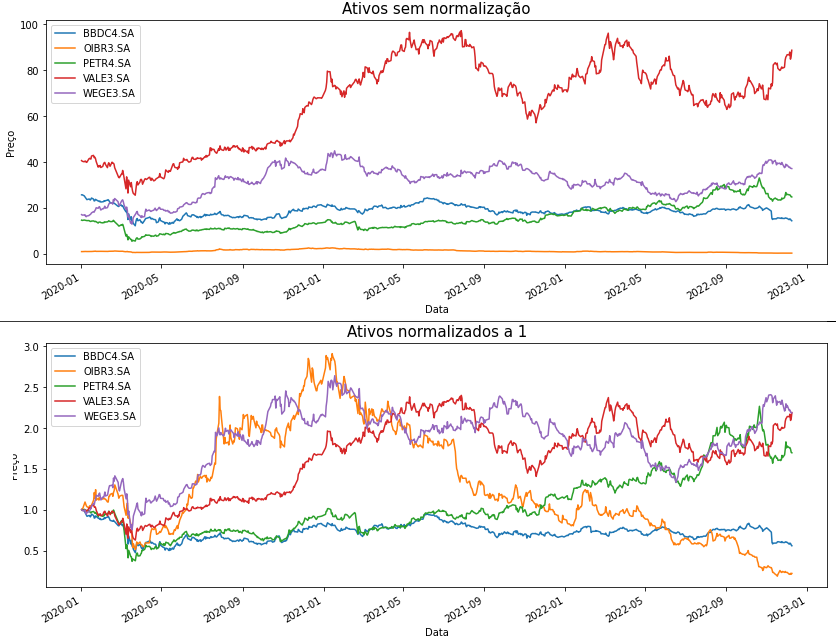

## 2 Obtenção dos dados

Utilizando a biblioteca yfinance, vamos obter os dados de negociação para algum papel, como por exemplo PETR4

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 495 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Bibliotecas

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
petro = yf.download("PETR4.SA", start="2010-01-01")

[*********************100%***********************]  1 of 1 completed


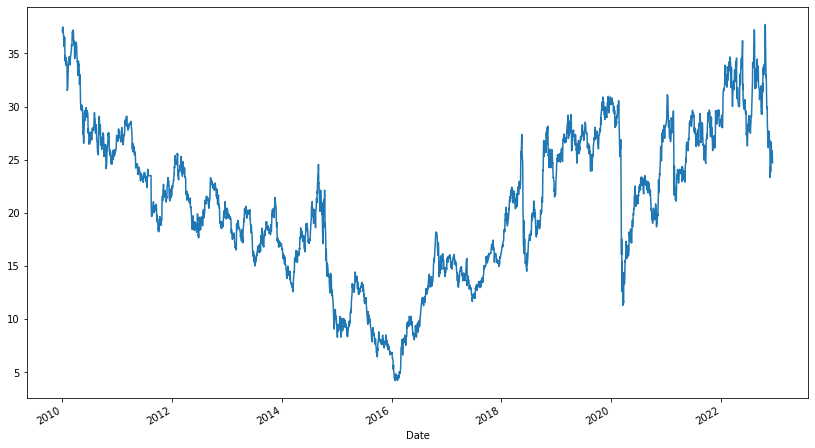

In [ ]:
petro.Close.plot(figsize = (14,8));

## 3 Médias móveis

### 3.1. O que são médias móveis?

Porque elas são tão importantes no mercado financeiro?

Algumas métricas com as quais podemos criar médias móveis: preço, retorno, volatilidade, drawdown


### 3.2. Médias móveis do preço

In [ ]:
petro.Close.head(10)

Date
2010-01-04    37.320000
2010-01-05    37.000000
2010-01-06    37.500000
2010-01-07    37.150002
2010-01-08    36.950001
2010-01-11    36.830002
2010-01-12    36.360001
2010-01-13    36.299999
2010-01-14    35.669998
2010-01-15    35.750000
Name: Close, dtype: float64

In [ ]:
# Média de 5 dias 
petro.Close.rolling(5).mean()

Date
2010-01-04       NaN
2010-01-05       NaN
2010-01-06       NaN
2010-01-07       NaN
2010-01-08    37.184
               ...  
2022-12-05    25.832
2022-12-06    25.884
2022-12-07    25.622
2022-12-08    25.460
2022-12-09    25.220
Name: Close, Length: 3211, dtype: float64

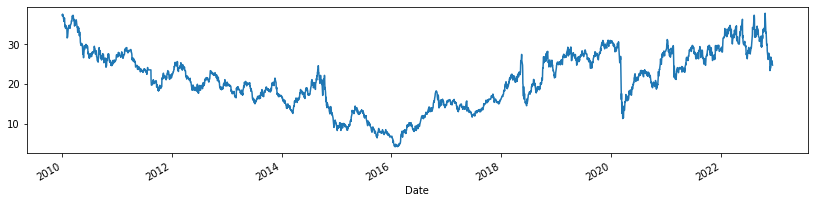

In [ ]:
petro.Close.plot(figsize = (14,3));

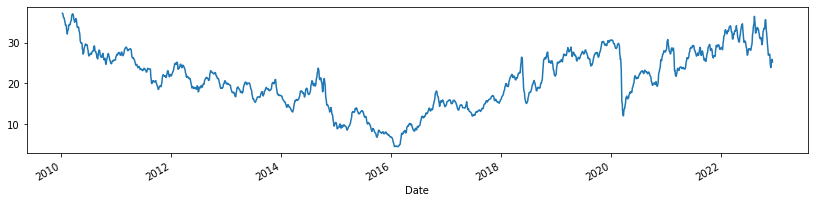

In [ ]:
petro.Close.rolling(5).mean().plot(figsize = (14,3));

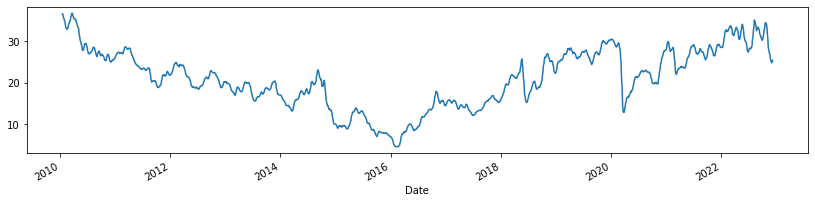

In [ ]:
# Média de 10 dias
petro.Close.rolling(10).mean().plot(figsize = (14,3))

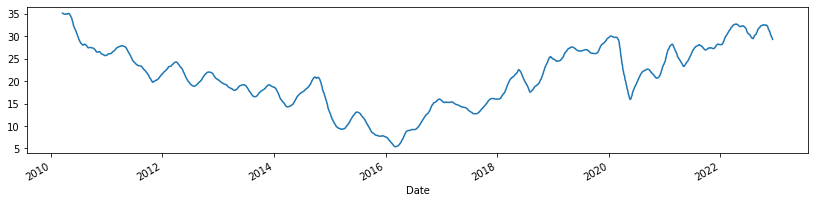

In [ ]:
# Média de 50 dias
petro.Close.rolling(50).mean().plot(figsize = (14,3))

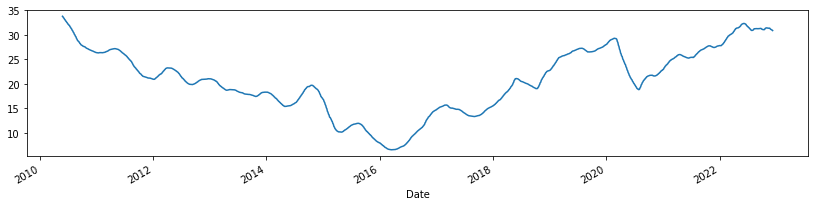

In [ ]:
# Média de 100 dias
petro.Close.rolling(100).mean().plot(figsize = (14,3))

## 4 Retornos diários

In [ ]:
petro.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,36.950001,37.320000,36.820000,37.320000,13.817436,13303600
2010-01-05,37.380001,37.430000,36.799999,37.000000,13.698956,21396400
2010-01-06,36.799999,37.500000,36.799999,37.500000,13.884080,18720600
2010-01-07,37.270000,37.450001,37.070000,37.150002,13.754493,10964600
2010-01-08,37.160000,37.389999,36.860001,36.950001,13.680443,14624200


Calculando os retornos diários

In [ ]:
petro['Adj Close'].pct_change().dropna()

Date
2010-01-05   -0.008575
2010-01-06    0.013514
2010-01-07   -0.009334
2010-01-08   -0.005384
2010-01-11   -0.003248
                ...   
2022-12-05   -0.011193
2022-12-06    0.000781
2022-12-07   -0.011310
2022-12-08   -0.022485
2022-12-09   -0.002825
Name: Adj Close, Length: 3210, dtype: float64

In [ ]:
retornos = pd.DataFrame(petro['Adj Close'].pct_change().dropna())
retornos

,Adj Close
Date,
2010-01-05,-0.008575
2010-01-06,0.013514
2010-01-07,-0.009334
2010-01-08,-0.005384
2010-01-11,-0.003248
...,...
2022-12-05,-0.011193
2022-12-06,0.000781
2022-12-07,-0.011310


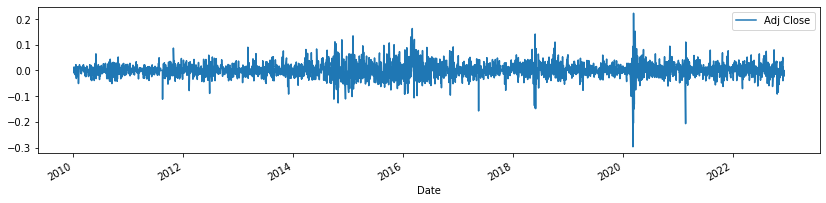

In [ ]:
# Gráfico dos retornos diários
retornos.plot(figsize = (14,3));

In [ ]:
retornos.mean()

Adj Close    0.000608
dtype: float64

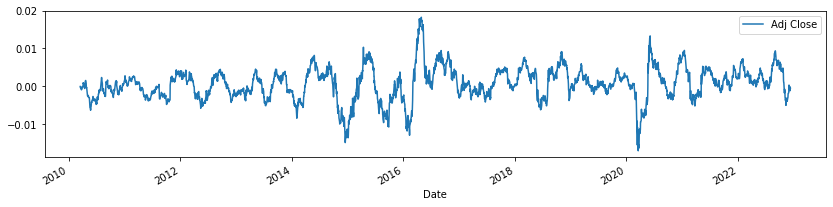

In [ ]:
# Média móvel dos retornos
retornos.rolling(50).mean().plot(figsize = (14,3));

## 5 Volatilidade

A medida mais básica de volatilidade que podemos ter é o desvio padrão

In [ ]:
# Calculando o desvio padrão dos retornos diários
retornos.std()

Adj Close    0.029052
dtype: float64

Portanto, essa é a volatilidade de PETR4 no período

E se quiséssemos visualizar a volatilidade em janelas de tempo, isto é, o comportamento da volatilidade de PETR4 ao longo de períodos específicos de tempo, por exemplo, 10 dias?

In [ ]:
janelas_vol = retornos.rolling(10).std()

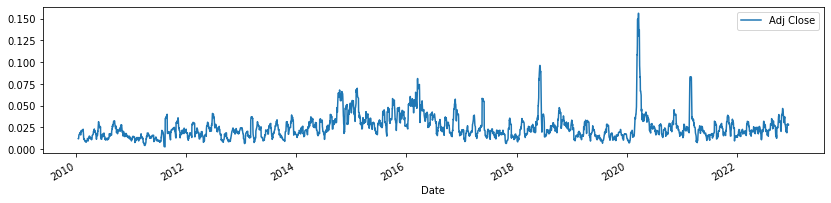

In [ ]:
janelas_vol.plot(figsize = (14,3));

## 6 Métricas estatísticas

In [ ]:
retornos.describe()

,Adj Close
count,3210.000000
mean,0.000608
std,0.029052
min,-0.296978
25%,-0.014118
50%,0.000000
75%,0.014649
max,0.222222


## 7 Distribuição dos retornos

Forma de entender onde os retornos se "concentram" com o tempo

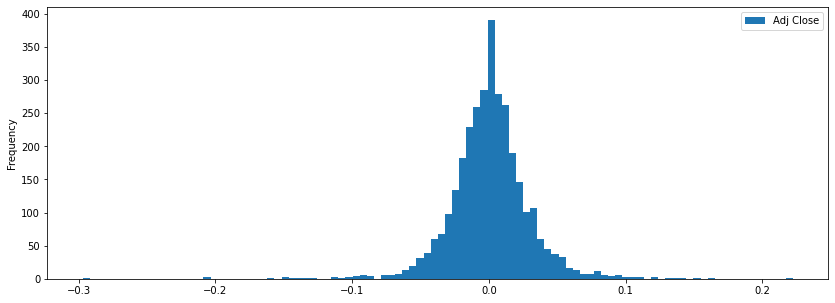

In [ ]:
retornos.plot.hist(bins = 100, figsize = (14,5));

## 8 Drawdown em janela de 30 dias

Perda máxima em um determinado período - distância entre ganho máximo e a mínima

In [ ]:
dd_30 = retornos.rolling(30).min()

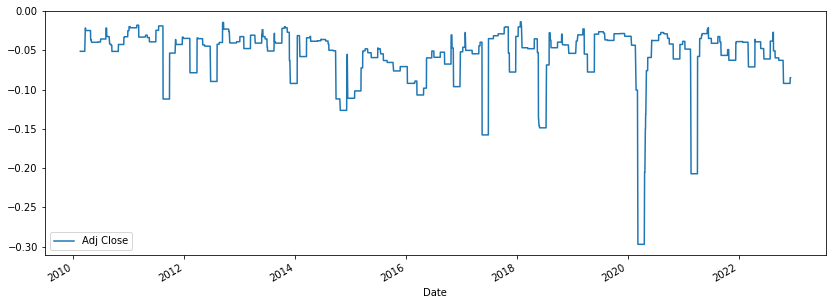

In [ ]:
dd_30.plot(figsize = (14,5));

## 9 Métricas de retorno acumulado

In [ ]:
# Calculando o retorno acumulado
ret_acum = (retornos + 1).cumprod()
ret_acum

,Adj Close
Date,
2010-01-05,0.991425
2010-01-06,1.004823
2010-01-07,0.995445
2010-01-08,0.990085
2010-01-11,0.986870
...,...
2022-12-05,1.854179
2022-12-06,1.855626
2022-12-07,1.834638


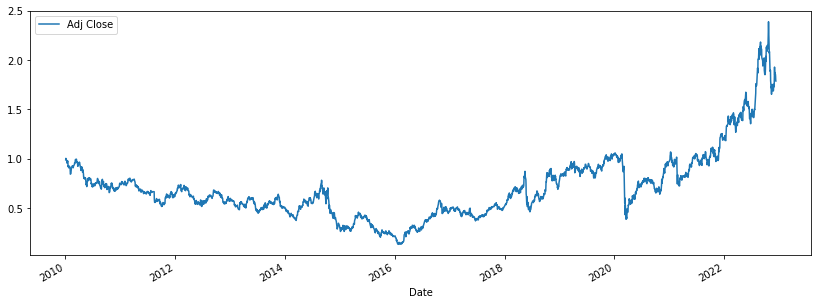

In [ ]:
ret_acum.plot(figsize = (14,5));

In [ ]:
# Vamos calcular agora o cumulativo máximo, ou seja, os picos atingidos ao longo do tempo
picos = ret_acum.cummax()
picos

,Adj Close
Date,
2010-01-05,0.991425
2010-01-06,1.004823
2010-01-07,1.004823
2010-01-08,1.004823
2010-01-11,1.004823
...,...
2022-12-05,2.388506
2022-12-06,2.388506
2022-12-07,2.388506


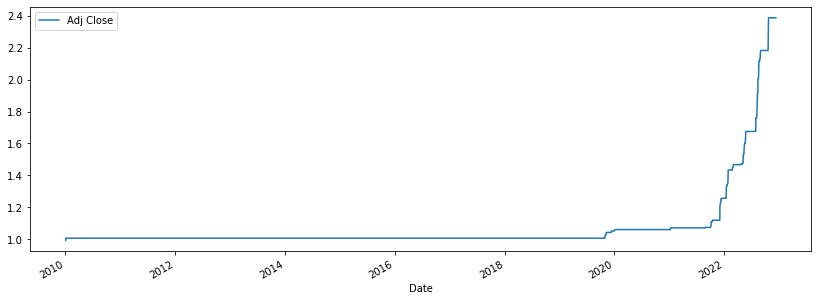

In [ ]:
picos.plot(figsize = (14,5));

#### Drawdown

Forma alternativa de cálculo do drawdown, considerando a diferença entre o retorno acumulado e os picos.

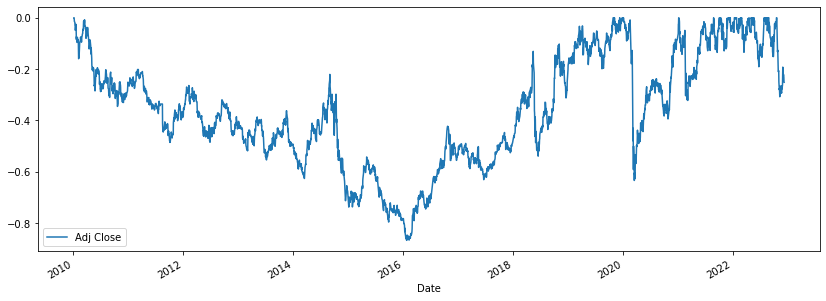

In [ ]:
drawdown = (ret_acum - picos)/picos
drawdown.plot(figsize = (14,5))

Qual o drawdown máximo? É justamente o valor mais 'fundo' que o gráfico acima atinge

In [ ]:
max_ddw = drawdown.min()
max_ddw

Adj Close   -0.866699
dtype: float64

In [ ]:
retornos['Retorno Acumulado'] = ret_acum
retornos['Picos'] = picos
retornos['Drawdowns'] = drawdown

In [ ]:
retornos.head()

,Adj Close,Retorno Acumulado,Picos,Drawdowns
Date,,,,
2010-01-05,-0.008575,0.991425,0.991425,0.000000
2010-01-06,0.013514,1.004823,1.004823,0.000000
2010-01-07,-0.009334,0.995445,1.004823,-0.009334
2010-01-08,-0.005384,0.990085,1.004823,-0.014667
2010-01-11,-0.003248,0.986870,1.004823,-0.017867


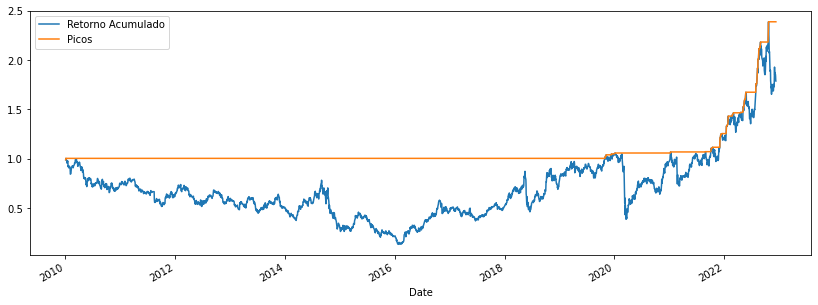

In [ ]:
retornos[['Retorno Acumulado', 'Picos']].plot(figsize = (14,5));

## 10 Normalização

Para explicar o conceito de normalização, vamos obter dados de vários papéis ao mesmo tempo para ficar mais fácil de exemplificar

In [ ]:
acoes = ['PETR4.SA', 'WEGE3.SA', 'VALE3.SA', 'BBDC4.SA', 'OIBR3.SA']

In [ ]:
data = yf.download(acoes, start="2020-01-01")['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [ ]:
data.head()

,BBDC4.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2020-01-02,25.633932,0.86,14.581381,40.585804,17.002590
2020-01-03,25.646910,0.86,14.462639,40.286995,16.785475
2020-01-06,25.188807,0.92,14.633625,40.047947,16.828899
2020-01-07,24.751215,0.94,14.576632,40.339279,16.959166
2020-01-08,24.368328,0.92,14.486387,40.346748,16.317474


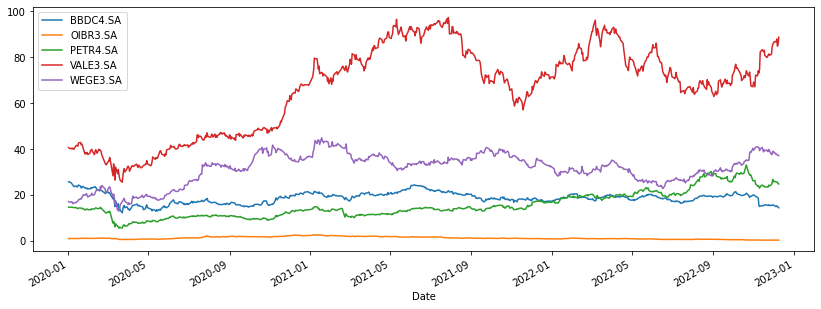

In [ ]:
data.plot(figsize = (14,5));

Observe que é 'injusto' realizar uma comparação de um papel numa magnitude mais alta com outros que possuem o preço menor.

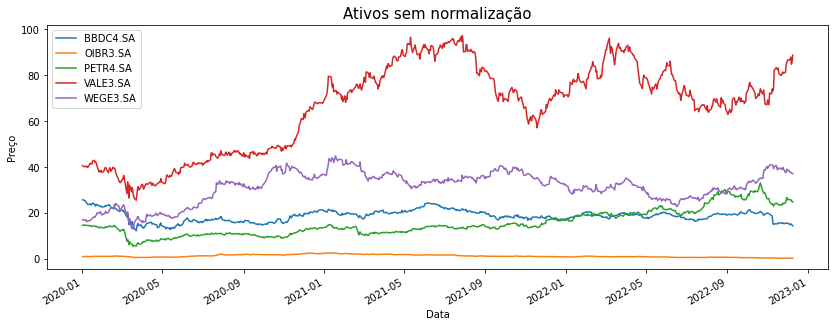

In [ ]:
data.plot(figsize = (14,5))
plt.title('Ativos sem normalização', fontsize = 15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

Introduzindo conceito da normalização

In [ ]:
normalizado = data/data.iloc[0]

In [ ]:
normalizado.head()

,BBDC4.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,1.000506,1.000000,0.991857,0.992638,0.987230
2020-01-06,0.982635,1.069767,1.003583,0.986748,0.989784
2020-01-07,0.965565,1.093023,0.999674,0.993926,0.997446
2020-01-08,0.950628,1.069767,0.993485,0.994110,0.959705


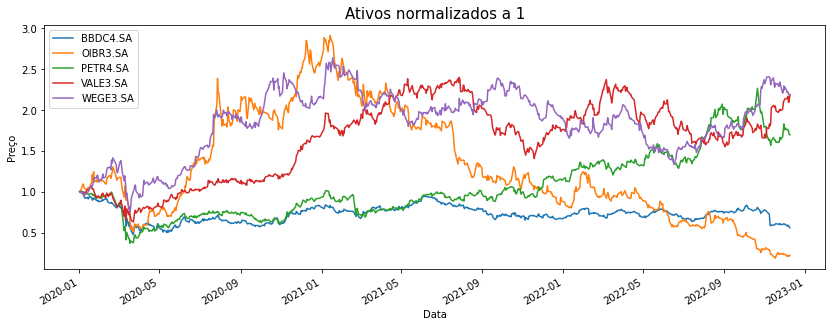

In [ ]:
normalizado.plot(figsize = (14,5))
plt.title('Ativos normalizados a 1', fontsize = 15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

## 11 Plot de cotação com volume

Vamos extrair dados para um ativo só

In [ ]:
wege = yf.download('WEGE3.SA', start = '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
wege.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,17.450001,17.735001,17.360001,17.620001,17.002592,5876000
2020-01-03,17.500000,17.625000,17.334999,17.395000,16.785477,7345800
2020-01-06,17.350000,17.549999,17.195000,17.440001,16.828897,6366600
2020-01-07,17.455000,17.584999,17.330000,17.575001,16.959169,6303600
2020-01-08,17.600000,17.610001,16.910000,16.910000,16.317469,8153800


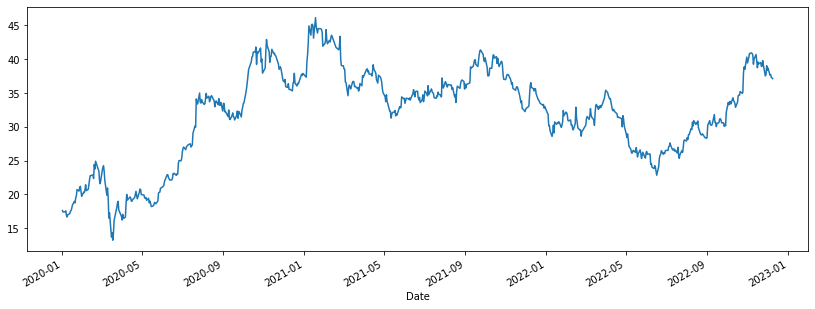

In [ ]:
wege.Close.plot(figsize = (14,5))

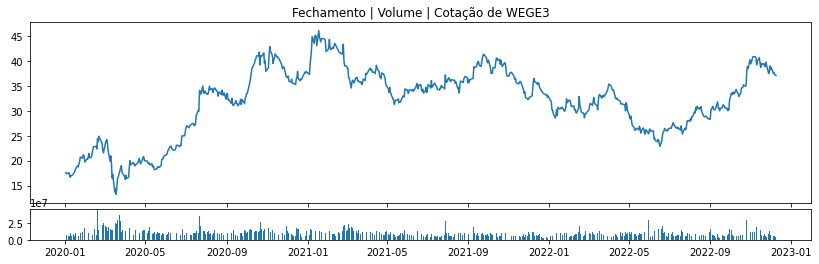

In [ ]:
fig = plt.figure(figsize = (14,4))
gs = fig.add_gridspec(nrows = 6, ncols =1)
ax1 = fig.add_subplot(gs[0:5, 0])
ax2 = fig.add_subplot(gs[5, 0])

ax1.plot(wege.Close)
ax2.bar(wege.index, wege.Volume)
ax1.set_title('Fechamento | Volume | Cotação de WEGE3');

##Exercício

Crie uma função que recebe um papel determinado pelo usuário (sem .SA) e cria um plot de cotação e volume, com dimensões e datas (início e fim) também especificadas pelo usuário.

In [ ]:
papel = 'PETR4'

In [ ]:
f'{papel}'

'PETR4'

In [ ]:
tamanho = (14,11)

In [ ]:
def plota_cotacao_volume(papel, tamanho, inicio):
    dados = yf.download(papel + '.SA', start = inicio)
    fig = plt.figure(figsize = tamanho)
    gs = fig.add_gridspec(nrows = 6, ncols =1)
    ax1 = fig.add_subplot(gs[0:5, 0])
    ax2 = fig.add_subplot(gs[5, 0])

    ax1.plot(dados.Close)
    ax2.bar(dados.index, dados.Volume)
    # O título do gráfico precisa ser adaptável ao papel determinado pelos usuários
    ax1.set_title(f'Fechamento | Volume | Cotação de {papel}')

[*********************100%***********************]  1 of 1 completed


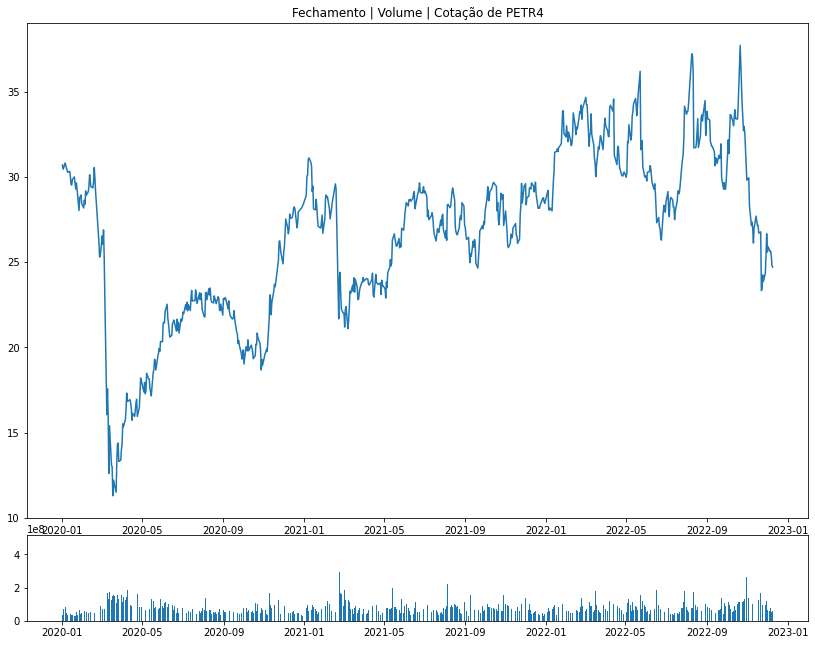

In [ ]:
plota_cotacao_volume(papel, tamanho, '2020-01-01')